In [1]:
#paquetes 
import numpy as np
import networkx as nx
import matplotlib.pylab as plt
%matplotlib inline
import os
from random import shuffle

In [2]:
G = nx.read_gml('dolphins.gml')

In [3]:
def ldata(archive):
    f=open(archive)
    data=[]
    for line in f:
        line=line.strip()
        col=line.split()
        data.append(col)
    return data

In [32]:
G

In [4]:
G.nodes

NodeView(('Beak', 'Beescratch', 'Bumper', 'CCL', 'Cross', 'DN16', 'DN21', 'DN63', 'Double', 'Feather', 'Fish', 'Five', 'Fork', 'Gallatin', 'Grin', 'Haecksel', 'Hook', 'Jet', 'Jonah', 'Knit', 'Kringel', 'MN105', 'MN23', 'MN60', 'MN83', 'Mus', 'Notch', 'Number1', 'Oscar', 'Patchback', 'PL', 'Quasi', 'Ripplefluke', 'Scabs', 'Shmuddel', 'SMN5', 'SN100', 'SN4', 'SN63', 'SN89', 'SN9', 'SN90', 'SN96', 'Stripes', 'Thumper', 'Topless', 'TR120', 'TR77', 'TR82', 'TR88', 'TR99', 'Trigger', 'TSN103', 'TSN83', 'Upbang', 'Vau', 'Wave', 'Web', 'Whitetip', 'Zap', 'Zig', 'Zipfel'))

In [5]:
dolphinsGender=ldata('dolphinsGender.txt')
#dolphinsGender

In [90]:
type(dolphinsGender)

list

In [7]:
dict_gender = {dolphin_nombre : genero for dolphin_nombre, genero  in dolphinsGender}

In [8]:
def AssignGender(G,dict_gender):
    for n in G.nodes:
        G.nodes[n]["gender"] = dict_gender[n]
    return

In [9]:
nx.get_node_attributes(G,'gender')

{}

In [10]:
def color(g):
    if g=='m':
        col='blue'
    elif g=='f':
        col='red'
    else:
        col='green'
    return col

# ITEM A. HACEMOS UNA COMPARACION DE LOS LAYOUTS

C:\Users\Elizabeth\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


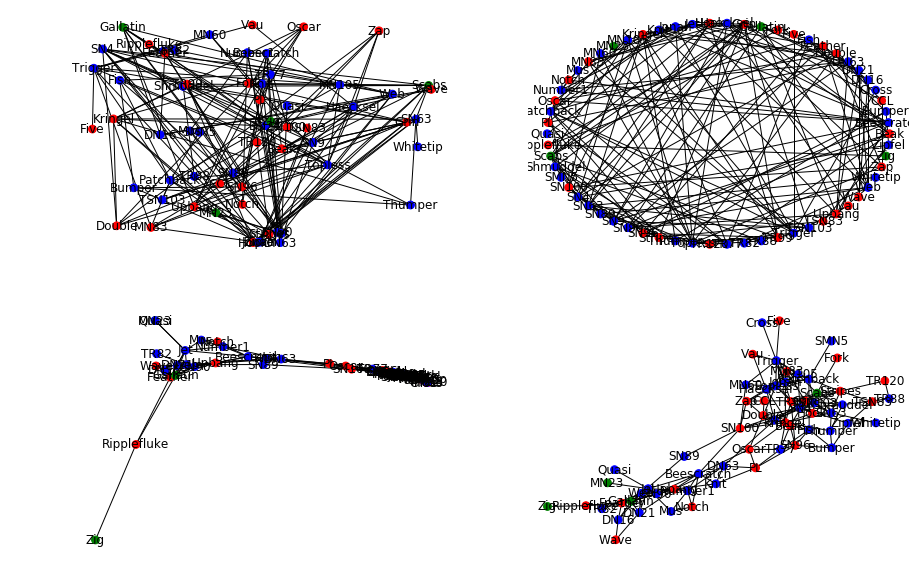

In [188]:
options = {'node_color':[color(g) for g in nx.get_node_attributes(G,'gender').values()],'node_size':60,'with_labels':True}
plt.figure(figsize=(15,10))
plt.subplot(221)
nx.draw_random(G, **options)
plt.subplot(222)
nx.draw_circular(G, **options)
plt.subplot(223)
nx.draw_spectral(G, **options)
plt.subplot(224)
nx.draw_spring(G, **options)




# AHORA NOS QUEDAMOS CON EL MEJOR LAYOUT PORQUE PERMITE VER BIEN UNA ESTRUCTURA. LO QUE HACE ESTE LAYOUT ES EL SIGUIENTE ALGORITMO:
Fruchterman-Reingold force-directed 
    
ref: https://en.wikipedia.org/wiki/Force-directed_graph_drawing

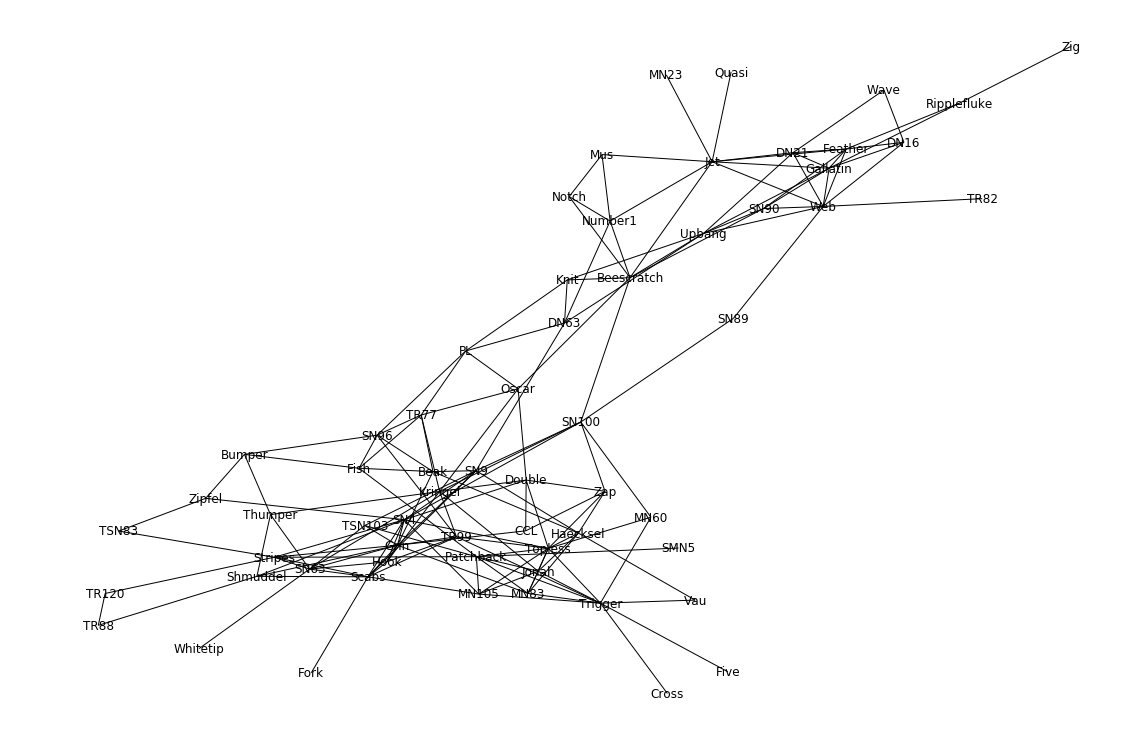

In [12]:
options = {'node_color':[color(g) for g in nx.get_node_attributes(G,'gender').values()],'node_size':200,'with_labels':True}
plt.figure(figsize=(15,10))
nx.draw_spring(G, **options)



In [13]:
#PARA VER SI ERA RED DIRIGIDA

set1=set(G.edges)
#set1
set2 = {(nombre2,nombre1) for nombre1, nombre2  in set1}
#set2
set1.intersection(set2)

set()

In [14]:
pos=nx.spring_layout(G)
pos

{'Beak': array([-0.19001891, -0.15976109]),
 'Beescratch': array([ 0.41141584, -0.03467136]),
 'Bumper': array([-0.32744294, -0.40711594]),
 'CCL': array([-0.12228902, -0.07953905]),
 'Cross': array([-0.41512293,  0.48517657]),
 'DN16': array([0.86832373, 0.24198342]),
 'DN21': array([0.79366825, 0.12713177]),
 'DN63': array([ 0.26346616, -0.08533439]),
 'Double': array([-0.11133487, -0.01580336]),
 'Feather': array([0.77064992, 0.22924626]),
 'Fish': array([-0.26027585, -0.2735212 ]),
 'Five': array([-0.5116831 ,  0.44403654]),
 'Fork': array([-0.70232443,  0.10822911]),
 'Gallatin': array([0.72914943, 0.19757529]),
 'Grin': array([-0.36734966, -0.08348162]),
 'Haecksel': array([-0.2133005 ,  0.11195443]),
 'Hook': array([-0.40138989, -0.12982592]),
 'Jet': array([0.73852445, 0.01206774]),
 'Jonah': array([-0.32840241,  0.09699877]),
 'Knit': array([ 0.3701245 , -0.13279082]),
 'Kringel': array([-0.21186667, -0.10793752]),
 'MN105': array([-0.43122871,  0.09644692]),
 'MN23': array([ 

In [15]:
p=0 #female
q=0 #male
r=0 #na
for i in range(np.shape(dolphinsGender)[0]):
    if dolphinsGender[i][1]=='f':
        p=p+1
    elif dolphinsGender[i][1]=='m':
        q=q+1
    else:
        r=r+1
[p,q,r]

[24, 34, 4]

# PUNTO B-I 

1ro: dividir el diccionario de dict_gender por la key y por el value. 

2do: La key la dejamos quita y vamo a aplicar shuffle al value. 

3ro: Eso del shuffle lo hacemos en cada iteracion (1000 en total) y generamos el diccionario devuelta uniendo ambas cosas 
para asignar atributo gender a los nodos. 

4to: Calculamos la modularidad $ \frac{1}{2m} \sum_{ij} \delta(c_{i}, c_{j}) (A_{ij}-\frac{k_{i}k_{j}}{m})$

$k_{i}$ el grado del nodo i, 
$k_{j}$ el grado del nodo j, 
$c_{i}$ la clase i, 
$c_{j}$ la clase j, 
$A_{ij} = 1$ si hay un enlace entre el nodo i y el nodo j o sino $A_{ij} = 0$
m la cantidad de enlaces total 

$\delta(c_{i}, c_{j}) = \frac{c_{i}c_{j} + 1}{2}$, esto es solo para dos clases.. aca tenemos 3


	

 
	

 
	

 



In [70]:
A = nx.to_numpy_matrix(G)                            #hace la adjency matrix
np.size(A[0]), np.size(nx.nodes(G))                  #chequeo que el tamano este bien

(62, 62, 0.0)

In [73]:
G.nodes()

NodeView(('Beak', 'Beescratch', 'Bumper', 'CCL', 'Cross', 'DN16', 'DN21', 'DN63', 'Double', 'Feather', 'Fish', 'Five', 'Fork', 'Gallatin', 'Grin', 'Haecksel', 'Hook', 'Jet', 'Jonah', 'Knit', 'Kringel', 'MN105', 'MN23', 'MN60', 'MN83', 'Mus', 'Notch', 'Number1', 'Oscar', 'Patchback', 'PL', 'Quasi', 'Ripplefluke', 'Scabs', 'Shmuddel', 'SMN5', 'SN100', 'SN4', 'SN63', 'SN89', 'SN9', 'SN90', 'SN96', 'Stripes', 'Thumper', 'Topless', 'TR120', 'TR77', 'TR82', 'TR88', 'TR99', 'Trigger', 'TSN103', 'TSN83', 'Upbang', 'Vau', 'Wave', 'Web', 'Whitetip', 'Zap', 'Zig', 'Zipfel'))

In [65]:
A = np.matrix([[1, 2, 2] ,[3 ,4,5]])
np.size(A[:,1])   #de la columna 1
np.size(A[:,1])   #de la fila 1


2

In [93]:
Degree = list(G.degree)                          #hago una lista a partir de lo que devuelve G.degree 
degree = [degree for node,degree in Degree]      #me quedo con un vector donde cada elemento es el grado para el nodo indexado como 0,1,2.. 
                                                 # que se corresponde con el nombre de los delfines segun el orden que muestra matriz A 
                                                 # que seria el que da G.nodes()
#degree

In [97]:
def delta(c_i, c_j):
    if  c_i == c_j:
        return 1 
    else:
        return 0 

In [102]:
delta(A[2], A[1])

1

In [123]:
#DEFINIMOSLA FUNCION MODULARIDAD a partir de un grafo G que ya tiene montado el campo escalar que le da una clase a cada nodo

def modularity(G,FieldString):
    modularity = 0
    m = np.size(nx.edges(G))
    A = nx.to_numpy_matrix(G)     
    for i in range(np.size(nx.nodes(G))):
        for j in range(np.size(nx.nodes(G))):
            A_ij = A[i,j]
            Degree = list(G.degree)                           #hago una lista a partir de lo que devuelve G.degree 
            degree = [degree for node,degree in Degree] 
            k_i = degree[i]
            k_j = degree[j]
            atrributes = list(nx.get_node_attributes(G,FieldString).values())
            c_i = atrributes[i]
            c_j = atrributes[j]
            modularity = (1/(2 * m)) * delta(c_i, c_j) * (A_ij + (k_i * k_j)/m) + modularity
    return modularity
            
            

In [127]:
modularity(G, 'gender')            #da un valor entre -1 y 1 entonces..creo que esta mas o menos bien 

0.46883034690083286

In [128]:
#genders=Array(dict_gender.values())
def BreakFieldAttribution(fieldAtributtion):
    names = [nodes for nodes,field in fieldAtributtion]
    field = [field for nodes,field in fieldAtributtion]
    return names,field


In [115]:
names = BreakFieldAttribution(dolphinsGender)[0]
genders = BreakFieldAttribution(dolphinsGender)[1]
np.random.shuffle(genders) 
dict_gender_together = dict(zip(names,genders))
H = nx.read_gml('dolphins.gml')                  #trabajamos sobre H (grafo nuevo)


In [137]:
DistributionModularity = []                           #vamos a ir appendando ahi en cada corrida 

names = BreakFieldAttribution(dolphinsGender)[0]
genders = BreakFieldAttribution(dolphinsGender)[1]
it = 1000                                              #numero de iteraciones 

for i in range(it):
    np.random.shuffle(genders)                       #los mezcla randomly 
    dict_gender_together = dict(zip(names,genders))  #los vuelvo a poner como un diccionario 
    H = nx.read_gml('dolphins.gml')                  #trabajamos sobre H (grafo nuevo)
    AssignGender(H,dict_gender_together)              
    #modularity = modularity(H,'gender')
    DistributionModularity.append(modularity(H,'gender'))

#ahora como output de este loop tenemos DistributionModularity que es la distribución de los valores de modularidad para la corrida 
#tantas veces 

#entonces nos quedaría hacer un histograma de esto y calcular el p value. 

In [139]:
np.savetxt('DistributionModularity.txt', DistributionModularity, delimiter=',') 

EL HISTOGRAMA DE DistributionModularity

Text(0,0.5,'Frecuencia')

C:\Users\Elizabeth\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


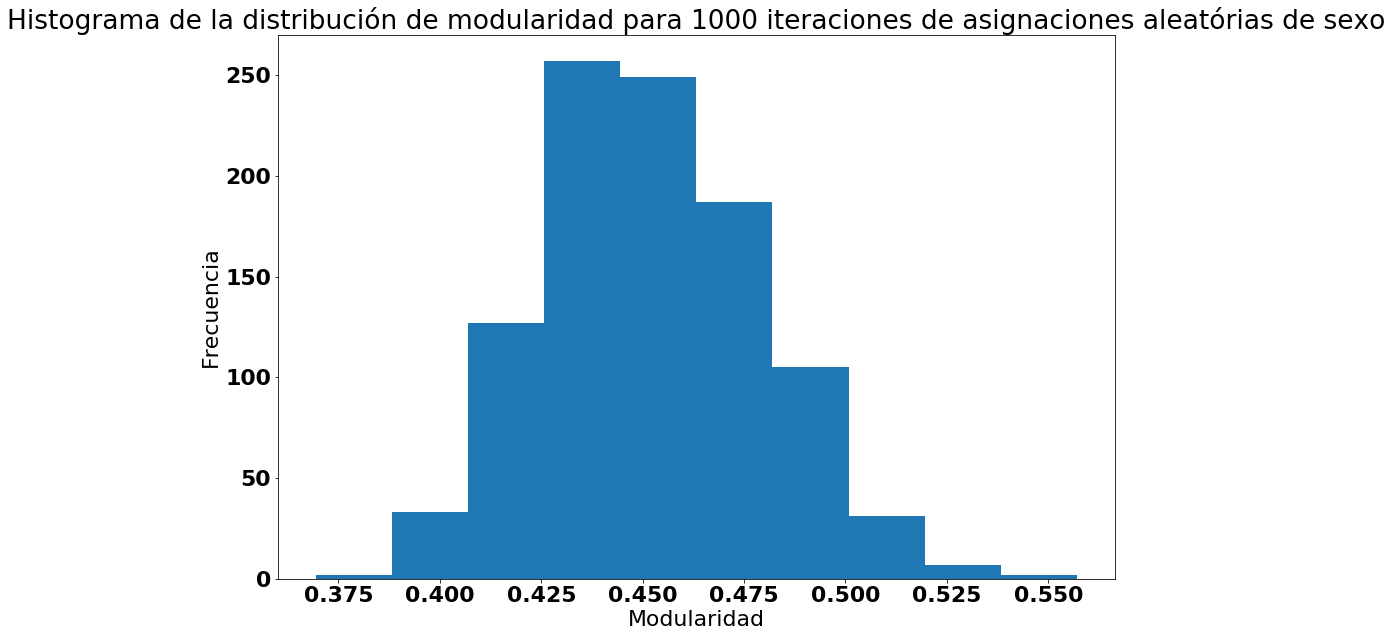

In [145]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

plt.figure(figsize=(15,10))
plt.hist(DistributionModularity)
plt.title("Histograma de la distribución de modularidad para 1000 iteraciones de asignaciones aleatorias de sexo")
plt.xlabel("Modularidad")
plt.ylabel("Frecuencia")


# PUNTO B-II

In [149]:
np.mean(DistributionModularity), modularity(G, 'gender'), np.std(DistributionModularity)

(0.4524053538230273, 0.46883034690083286, 0.027015608737991276)

Entonces, el valor que sale aleatorio es: $0.452 \pm 0.027$ en unidades arbitrarias 
Y el valor real es 0.469 que se encuentra dentro del intervalo del valor medio de la distribucion aleatoria

# PUNTO B-III: CALCULO DEL P VALUE 

In [178]:
#CALCULO LAS APARICIONES DE VALORES POR ENCIMA DEL QUE PRESENTA NUESTRO GRAFO CON LA ATRIBUCION DE GENERO 

frecuencia = 0
for i in range(np.size(DistributionModularity)):
    if DistributionModularity[i] >=  0.469:                  #como nuestro valor real se encuentra a derecha buscamos los eventos mas extremos a derecha
        frecuencia = frecuencia + 1 
frecuencia

271

In [187]:
pvalue = (max(DistributionModularity) - 0.469) * (frecuencia/it)                #es el area a derecha del valor real en el histograma
if pvalue <= (1/1000):                                                          #en general se toma ese valor 
    print("fuera de la hipotesis nula")
else:
    print ("en la hipotesis nula")

en la hipotesis nula


como tenemos un pvalue grande que el tipico treashold entonces decimos que nuestro resultado se condice con lo de la hipotesis nula entonces que no hay homofilia fuera de la homofilia que se genera de forma aleatoria. 